# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [9]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [10]:
wine <- read_csv("wine.csv")
glimpse(wine)
summary(wine)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [11]:
wine_mutate <- wine %>%
  mutate(across(where(is.numeric) & -class, ~ as.numeric(scale(.))))

wine_mutate

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


Scaling and centering this data is helpful before we perform PCA because there were a wide range of numbers and each column was on a different scale. It will be difficult to transform the data during the PCA if it were all on different scales. 

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [12]:
wine_pca <- prcomp(wine_mutate, center = TRUE, scale. = TRUE)

In [13]:
summary(wine_pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3529 1.5802 1.2025 0.96328 0.93675 0.82023 0.74418
Proportion of Variance 0.3954 0.1784 0.1033 0.06628 0.06268 0.04806 0.03956
Cumulative Proportion  0.3954 0.5738 0.6771 0.74336 0.80604 0.85409 0.89365
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.5916 0.54272 0.51216 0.47524 0.41085 0.35995 0.24044
Proportion of Variance 0.0250 0.02104 0.01874 0.01613 0.01206 0.00925 0.00413
Cumulative Proportion  0.9186 0.93969 0.95843 0.97456 0.98662 0.99587 1.00000

b) The proportion of variance for PC1 is 0.3964 (39.64% of the total variance) and the proportion of variance for PC2 is 0.1784 (17.84% of the total variance). 
We use the summary function to see that variance. 

c) We are doing PCA first because it allows us to find what the structure of the data is before we manipulate it in any other way. We are keeping the most important data in order to prepare for visualization. 

d) The rotation matrix are the coordinates we used based on the variation in the PCA to rotate the data. 

In [14]:
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.136325011,-0.484160868,-0.207400812,-0.08191848,0.25089415,0.13517139,0.09269887,-0.42154435,-0.450190708,0.31127983,0.22154641,-0.26411262,-0.05610645,0.090626055
Malicacid,0.222676383,-0.223590947,0.088796064,0.46988824,0.18860015,0.59841948,-0.37436980,-0.08757556,-0.006025687,-0.32592413,-0.06839251,0.11921210,0.06675544,-0.025225306
Ash,-0.002257932,-0.315855884,0.626102363,-0.24984122,0.09352360,0.10799983,0.16708856,0.17208034,0.262494455,-0.12452347,0.49452428,-0.04502305,-0.19201787,-0.001635816
Alcalinity_of_ash,0.224298489,0.011615737,0.611989600,0.07199322,-0.04656750,-0.08811224,0.26872469,-0.41324857,-0.118633417,0.15716811,-0.47461722,-0.06131271,0.20007784,-0.095361066
Magnesium,-0.124630159,-0.300551432,0.130984580,-0.16321412,-0.77833048,0.14483831,-0.32957951,0.14881189,-0.252536278,0.12773363,-0.07119731,0.06116074,0.05829909,0.022300745
Total_phenols,-0.359264042,-0.067119829,0.146507749,0.19098521,0.14466563,-0.14809748,0.03789829,0.36343884,-0.406373544,-0.30772263,-0.29740957,-0.30087591,-0.35952714,-0.253037788
Flavanoids,-0.390711715,0.001313454,0.150962746,0.14461667,0.11200553,-0.06247252,0.06773223,0.17540500,-0.090919334,-0.14044000,0.03219187,-0.05001396,0.59834288,0.601909165
Nonflavanoid_phenols,0.267001203,-0.026988703,0.169975512,-0.32801272,0.43257916,-0.25868639,-0.61111195,0.23075135,-0.159122818,0.24054263,-0.12200984,0.04266558,0.06403952,0.082230935
Proanthocyanins,-0.279062504,-0.041222563,0.149879586,0.46275771,-0.09158820,-0.46627764,-0.42292282,-0.34373920,0.265786794,0.10869629,0.23292405,-0.09334264,-0.11013538,-0.058641979
Color_intensity,0.089318293,-0.529782740,-0.137266298,0.07211248,0.04626960,-0.42525454,0.18613617,0.04069617,-0.075264592,-0.21704255,-0.01972448,0.59795428,0.15917751,-0.178821145


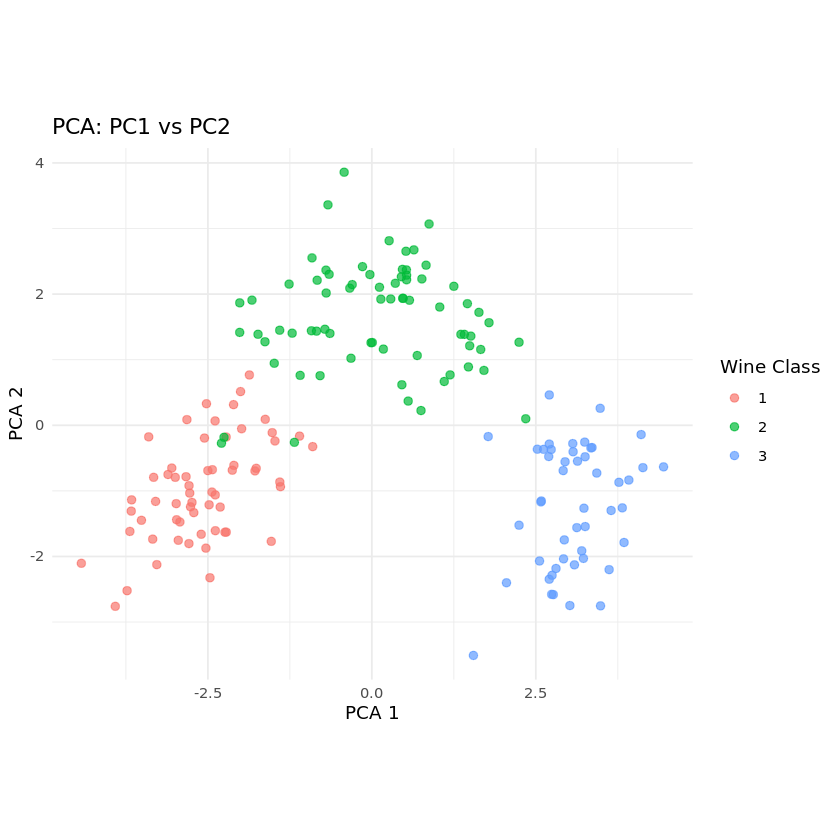

In [23]:
wine_coloring <- as.data.frame(wine_pca$x) %>%
  select(PC1, PC2) %>%
  mutate(class = wine$class)    

ggplot(wine_coloring, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(alpha = 0.7, size = 2) +
  coord_fixed() +
  labs(title = "PCA: PC1 vs PC2",
       x = "PCA 1",
       y = "PCA 2",
       color = "Wine Class") +
  theme_minimal()

f) Wine class 1 clusters to the lower-left of the plot, wine class 2 clusters in the top middle of the plot, wine class 3 clusters to the lower-right of the plot. 
In the context of wine classes, it demonstrates that the 3 different wine classes are chemically different and that there is enough variation in the context of PCA1 and PCA2. 

g) PCA would fail in the case in which there were not any variation within the data, and we would see a lot of overlap between the three different wine classes and thus PCA1 and PCA2 would not seperate the data. 

h) A vector space is flat and linear and is used by PCA, a manifold can be curved and nonlinear, and T-SNE helps us visualize the data by operating on the manifolds. 

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [22]:
wine_tsne <- as.data.frame(wine_pca$x) %>% 
    select(PC1:PC10) %>% 
    mutate(class= wine$class) %>%
    distinct()

set.seed(123)

tsne_results <- Rtsne(
  wine_tsne %>% select(-class),
  dims = 2,                          
  perplexity = 30,                
  verbose = TRUE, 
)

Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.610213)!
Learning embedding...
Iteration 50: error is 49.831755 (50 iterations in 0.01 seconds)
Iteration 100: error is 50.330684 (50 iterations in 0.01 seconds)
Iteration 150: error is 51.224648 (50 iterations in 0.01 seconds)
Iteration 200: error is 50.796777 (50 iterations in 0.02 seconds)
Iteration 250: error is 49.850371 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.475958 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.344963 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.345161 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.349556 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.347533 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.348368 (50 iterations in 0.01 seconds)
Iteration 600

New names:
• `` -> `...1`
• `` -> `...2`


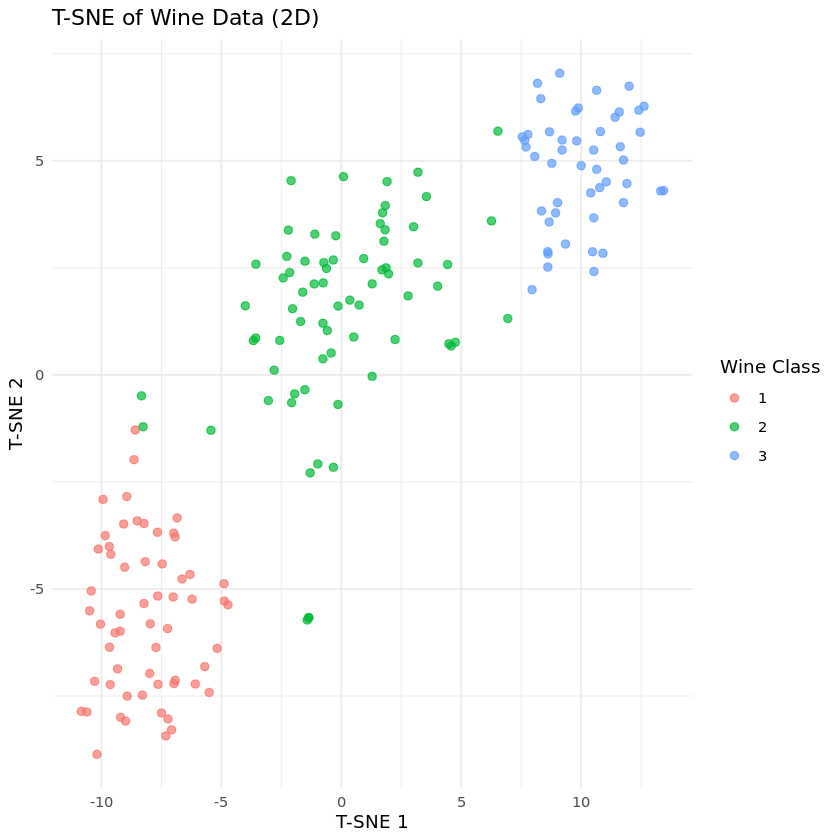

In [21]:
tsne <- as_tibble(tsne_results$Y, .name_repair = "unique") %>%
  rename(TSNE1 = ...1, TSNE2 = ...2) %>%
  mutate(class = wine_tsne$class)

ggplot(tsne, aes(x = TSNE1, y = TSNE2, color = factor(class))) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = "T-SNE of Wine Data (2D)",
    x = "T-SNE 1",
    y = "T-SNE 2",
    color = "Wine Class"
  ) +
  theme_minimal()

c) We didn't stop at PCA because PCA is mainly used for dimensionality reduction, and T-SNE is able to visualize nonlinear relationships. 

d) This type of data also works for complex datasets in which we suspect that the relationships may be nonlinear and we can go through the workflow to evaluate the data relationships. 